In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from torchvision import models
from torchinfo import summary

import numpy as np
from numpy import linalg as LA
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:

def load_train_img(file_path):
    with open(file_path) as f:
        lines = f.readlines()
    imgs, labels = [], []
    target_size=(128, 128)
    print('Total train images:', len(lines))
    for i in tqdm(range(len(lines)), desc="Loading images"):
    # for i in tqdm(range(100), desc="Loading images"):
        fn, label = lines[i].strip().split(' ')
        im1 = cv2.imread(fn)
        # 如果需要進行影像處理，請在這裡添加相應的處理步驟
        im1 = cv2.resize(im1, target_size)
        # 轉換成 PyTorch Tensor
        im1_tensor = torch.from_numpy(im1.transpose(2, 0, 1))  # 把channel 移到最前面

        imgs.append(im1_tensor) 
        labels.append(int(label))

    imgs_tensor = torch.stack(imgs) 
    labels_tensor = torch.tensor(labels)

    return imgs_tensor, labels_tensor

def load_img(f):
    f=open(f)
    lines=f.readlines()
    imgs, labels=[], []
    target_size=(128, 128)
    print('total images:', len(lines))
    for i in tqdm(range(len(lines)), desc="Loading images"):
    # for i in tqdm(range(100), desc="Loading images"):
        fn, label = lines[i].split(' ')
        
        # 原圖
        im1=cv2.imread(fn)
        im1 = cv2.resize(im1, target_size)
        # 轉換成 PyTorch Tensor
        im1_tensor = torch.from_numpy(im1.transpose(2, 0, 1))  # 把channel 移到最前面

        imgs.append(im1_tensor) 
        labels.append(int(label))

    imgs_tensor = torch.stack(imgs)
    labels_tensor = torch.tensor(labels)

    return imgs_tensor, labels_tensor

x, y = load_train_img('train.txt')
val_x, val_y = load_img('val.txt')
tx, ty = load_img('test.txt')

Total train images: 63325


Loading images: 100%|██████████| 63325/63325 [00:24<00:00, 2597.12it/s]


total images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2822.94it/s]


total images: 450


Loading images: 100%|██████████| 450/450 [00:00<00:00, 2841.71it/s]


In [3]:
y_tensor = torch.nn.functional.one_hot(y, num_classes=50)
val_y_tensor = torch.nn.functional.one_hot(val_y, num_classes=50)
test_y_tensor = torch.nn.functional.one_hot(ty, num_classes=50)
train_dataset = TensorDataset(x, y_tensor)
val_dataset = TensorDataset(val_x, val_y_tensor)
test_dataset = TensorDataset(tx, test_y_tensor)

batch_size = 128  # 可以自行調整 batch size 的大小
shuffle = True   # 是否對資料進行洗牌
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=shuffle)


In [9]:
model = models.resnet34(pretrained=False,num_classes = 50)
num_classes = 50
# model.fc = nn.Linear(model.fc.in_features, num_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
summary(model)

Layer (type:depth-idx)                   Param #
ResNet                                   --
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
│    └─BasicBlock: 2-1                   --
│    │    └─Conv2d: 3-1                  36,864
│    │    └─BatchNorm2d: 3-2             128
│    │    └─ReLU: 3-3                    --
│    │    └─Conv2d: 3-4                  36,864
│    │    └─BatchNorm2d: 3-5             128
│    └─BasicBlock: 2-2                   --
│    │    └─Conv2d: 3-6                  36,864
│    │    └─BatchNorm2d: 3-7             128
│    │    └─ReLU: 3-8                    --
│    │    └─Conv2d: 3-9                  36,864
│    │    └─BatchNorm2d: 3-10            128
│    └─BasicBlock: 2-3                   --
│    │    └─Conv2d: 3-11                 36,864
│    │    └─BatchNorm2d: 3-12            12

Evaluating: 100%|██████████| 4/4 [00:00<00:00, 71.67it/s]


Epoch 1/10, Training Loss: 3.1213, Training Accuracy: 16.07%, Validation Accuracy: 12.67%


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 98.04it/s]


Epoch 2/10, Training Loss: 2.5530, Training Accuracy: 27.76%, Validation Accuracy: 26.89%


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 96.68it/s]


Epoch 3/10, Training Loss: 2.1731, Training Accuracy: 36.74%, Validation Accuracy: 31.56%


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 85.87it/s]


Epoch 4/10, Training Loss: 1.8725, Training Accuracy: 44.24%, Validation Accuracy: 40.22%


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 95.59it/s]


Epoch 5/10, Training Loss: 1.6200, Training Accuracy: 50.90%, Validation Accuracy: 42.00%


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 95.11it/s]


Epoch 6/10, Training Loss: 1.3915, Training Accuracy: 56.79%, Validation Accuracy: 42.22%


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 92.10it/s]


Epoch 7/10, Training Loss: 1.1706, Training Accuracy: 62.83%, Validation Accuracy: 46.67%


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 94.81it/s]


Epoch 8/10, Training Loss: 0.9515, Training Accuracy: 68.96%, Validation Accuracy: 48.89%


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 97.05it/s]


Epoch 9/10, Training Loss: 0.7336, Training Accuracy: 75.55%, Validation Accuracy: 43.78%


Evaluating: 100%|██████████| 4/4 [00:00<00:00, 96.37it/s]


Epoch 10/10, Training Loss: 0.5502, Training Accuracy: 81.41%, Validation Accuracy: 43.56%


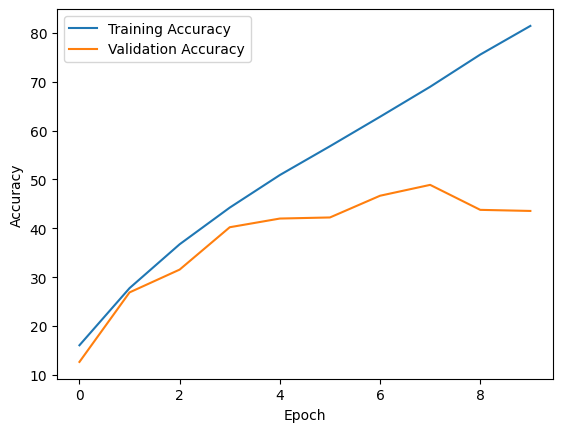

In [12]:


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

traing_acc = []
val_acc = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}"):

        inputs, labels = inputs.float().to(device), labels.float().to(device)  # 將數據移動到設備上
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        labels = labels.argmax(dim=1)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        train_total += labels.size(0)

    traing_acc.append(100 * train_correct / train_total)

    epoch_loss = running_loss / len(train_loader.dataset)

    model.eval()  
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc="Evaluating"):
            inputs, labels = inputs.float().to(device), labels.float().to(device)
            labels = labels.argmax(dim=1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            # print(predicted.shape)
            # print(labels.shape)
            
            correct += (predicted == labels).sum().item()

    val_acc.append(100 * correct / total)

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {100 * train_correct / train_total:.2f}%, Validation Accuracy: {100 * correct / total:.2f}%")

plt.plot(traing_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("./results/HW2-2/ResNet34_accuracy_plot.png")
plt.show()


In [13]:
model.eval() 
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Evaluating"):
        inputs, labels = inputs.float().to(device), labels.float().to(device)
        labels = labels.argmax(dim=1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        # print(predicted.shape)
        # print(labels.shape)
        
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"test Accuracy: {accuracy:.4f}")

Evaluating: 100%|██████████| 4/4 [00:00<00:00, 84.48it/s]

test Accuracy: 0.4756


In [14]:
torch.save(model, './model/HW2-2/resnet34/resnet34.pth')